In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from MakeSTFTs import *
from Train import *
from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
Using sample rate=44100 Hz, FFT=1024 buckets, hop=768 samples


In [3]:
# Read all available samples and convert to STFTs
#make_STFTs()

Loaded 930 STFTs from STFTs.pkl
Using 930 STFTs


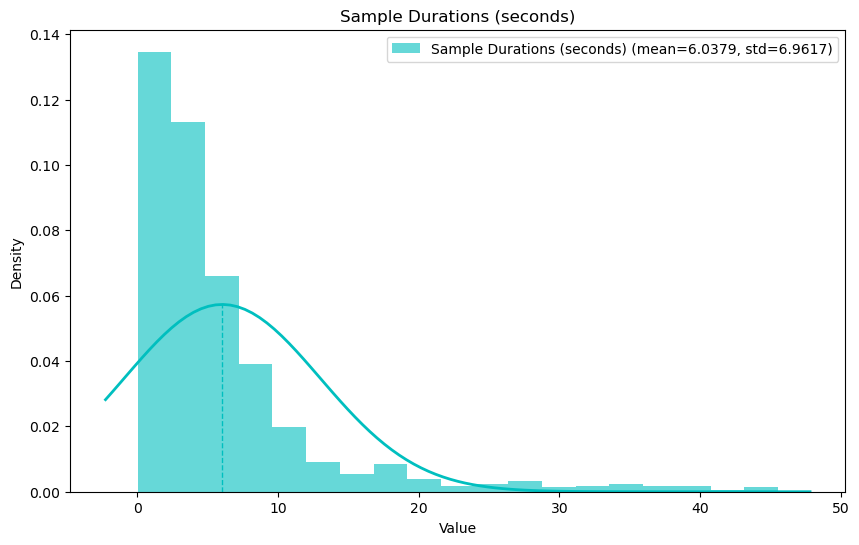

Input STFTs: torch.Size([930, 114, 1024]) x torch.float32
train_model: hyper-parameters=[6, 7.753192086063947, 7.411389428825689, 5.301401097330652, 9, 0.0009685451968313163, 5.151727534054279e-05]
layers=[116736, 1802, 340, 46, 6] -> approx model size=421,978,124 parameters
hyper-parameters:
	model: latent=6, layer3=46, layer2=340, layer1=1802
	optimiser: batch=9, learning_rate=0.001, weight_decay=5e-05
STFTVariationalAutoEncoder: sequence_length=114, stft_buckets=1024, sizes=[116736, 1802, 340, 46, 6], activation_fn=<class 'torch.nn.modules.activation.ReLU'>
model=STFTVariationalAutoEncoder(
  (vae): VariationalAutoEncoder(
    (encoder_layers): ModuleList(
      (0): Linear(in_features=116736, out_features=1802, bias=True)
      (1): Linear(in_features=1802, out_features=340, bias=True)
      (2): Linear(in_features=340, out_features=46, bias=True)
    )
    (fc_mu): Linear(in_features=46, out_features=6, bias=True)
    (fc_logvar): Linear(in_features=46, out_features=6, bias=True)


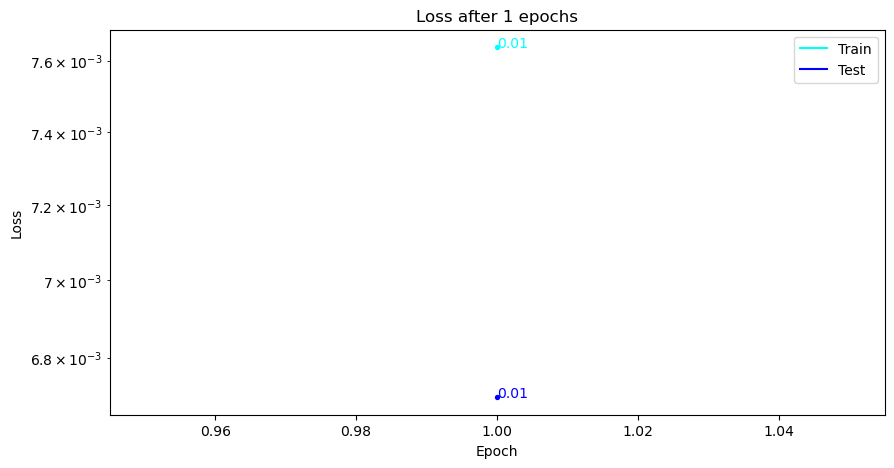

total=14 sec, epoch=1 (13.6 sec/epoch), train=0.0076 (0.00%), test=0.0067 (0.00%), overfit=0.88


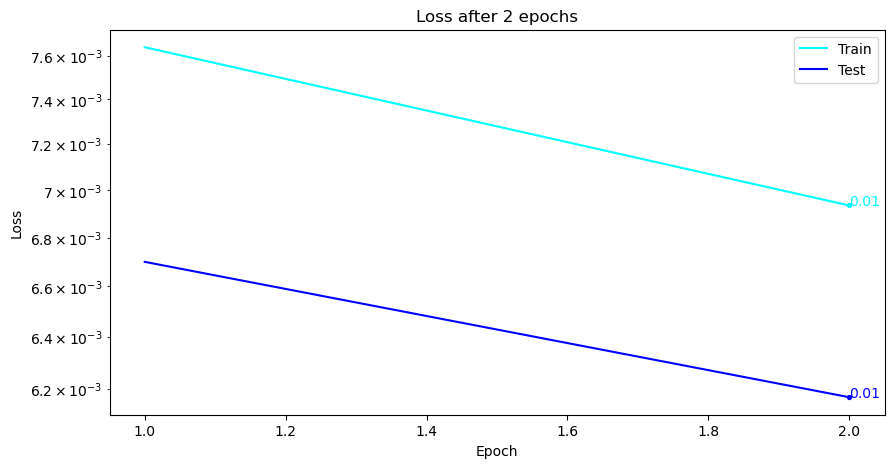

total=27 sec, epoch=2 (13.6 sec/epoch), train=0.0069 (-9.23%), test=0.0062 (-7.95%), overfit=0.89


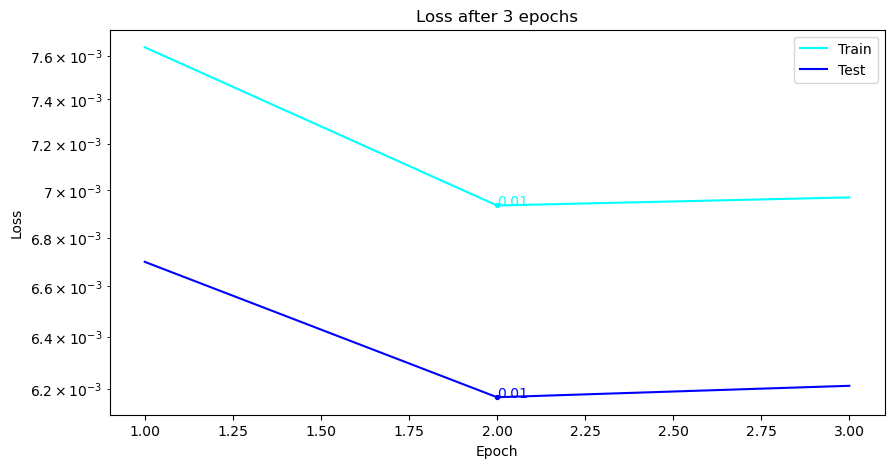

total=41 sec, epoch=3 (13.6 sec/epoch), train=0.0070 (0.50%), test=0.0062 (0.70%), overfit=0.89
total=54 sec, epoch=4 (13.5 sec/epoch), train=0.0069 (-0.75%), test=0.0062 (-0.87%), overfit=0.89


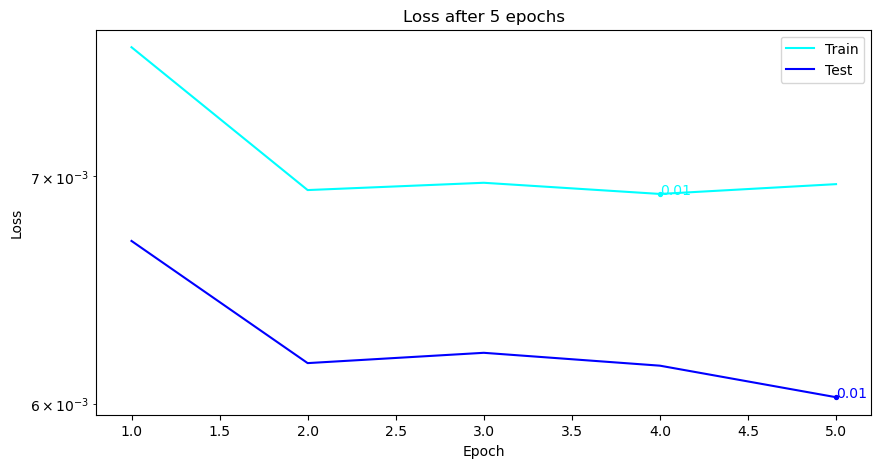

total=68 sec, epoch=5 (13.5 sec/epoch), train=0.0070 (0.67%), test=0.0060 (-2.12%), overfit=0.87
total=81 sec, epoch=6 (13.5 sec/epoch), train=0.0069 (-0.67%), test=0.0061 (1.09%), overfit=0.88


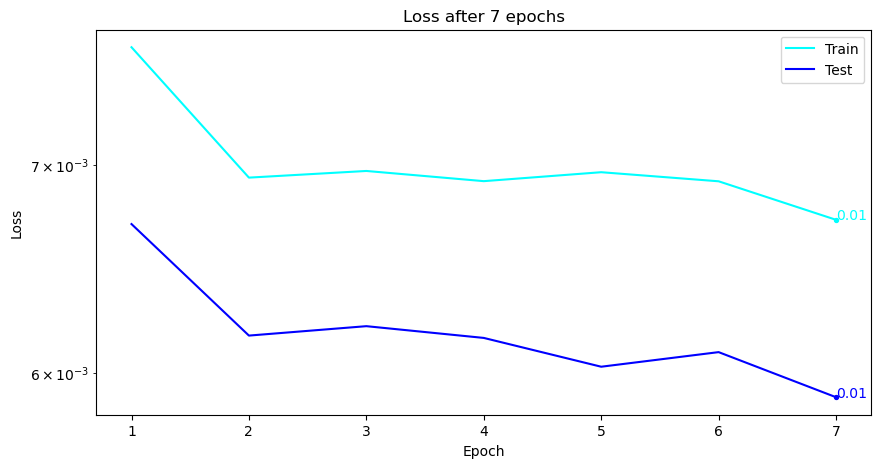

total=94 sec, epoch=7 (13.5 sec/epoch), train=0.0067 (-2.82%), test=0.0059 (-3.29%), overfit=0.88
total=108 sec, epoch=8 (13.5 sec/epoch), train=0.0066 (-1.39%), test=0.0059 (-0.31%), overfit=0.89
total=121 sec, epoch=9 (13.5 sec/epoch), train=0.0066 (-0.08%), test=0.0059 (-0.05%), overfit=0.89


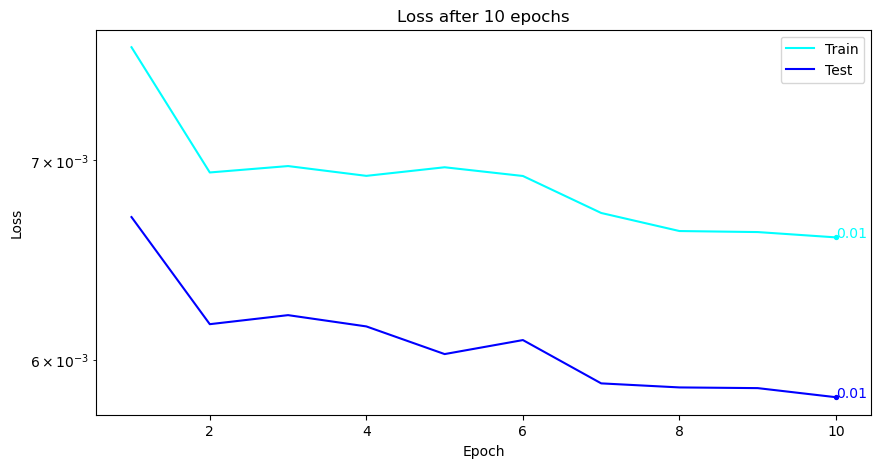

total=135 sec, epoch=10 (13.5 sec/epoch), train=0.0066 (-0.41%), test=0.0058 (-0.70%), overfit=0.88
total=149 sec, epoch=11 (13.5 sec/epoch), train=0.0066 (0.04%), test=0.0059 (0.72%), overfit=0.89
total=162 sec, epoch=12 (13.5 sec/epoch), train=0.0066 (-0.55%), test=0.0058 (-1.42%), overfit=0.88
total=175 sec, epoch=13 (13.5 sec/epoch), train=0.0066 (0.68%), test=0.0058 (1.01%), overfit=0.88


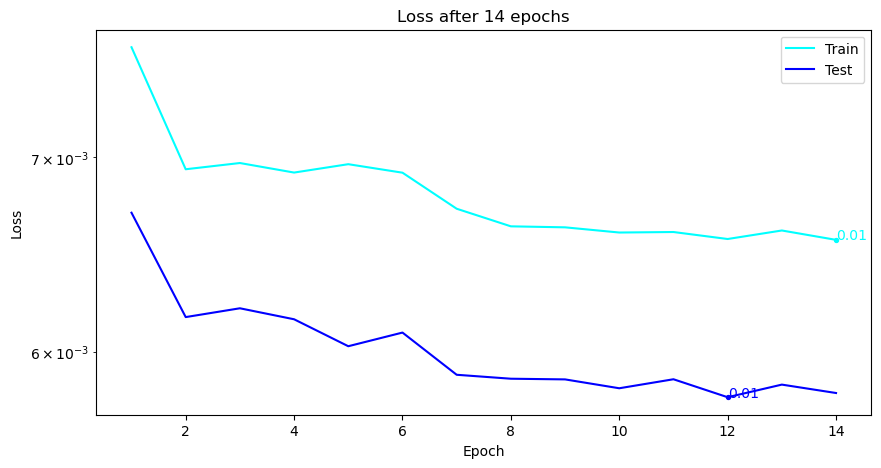

total=189 sec, epoch=14 (13.5 sec/epoch), train=0.0066 (-0.74%), test=0.0058 (-0.66%), overfit=0.89
total=202 sec, epoch=15 (13.5 sec/epoch), train=0.0066 (0.19%), test=0.0058 (0.57%), overfit=0.89
total=216 sec, epoch=16 (13.5 sec/epoch), train=0.0066 (0.23%), test=0.0058 (-0.23%), overfit=0.88
total=229 sec, epoch=17 (13.5 sec/epoch), train=0.0066 (-0.37%), test=0.0059 (0.52%), overfit=0.89
total=243 sec, epoch=18 (13.5 sec/epoch), train=0.0065 (-0.70%), test=0.0058 (-1.07%), overfit=0.89
total=256 sec, epoch=19 (13.5 sec/epoch), train=0.0066 (1.29%), test=0.0058 (0.69%), overfit=0.88


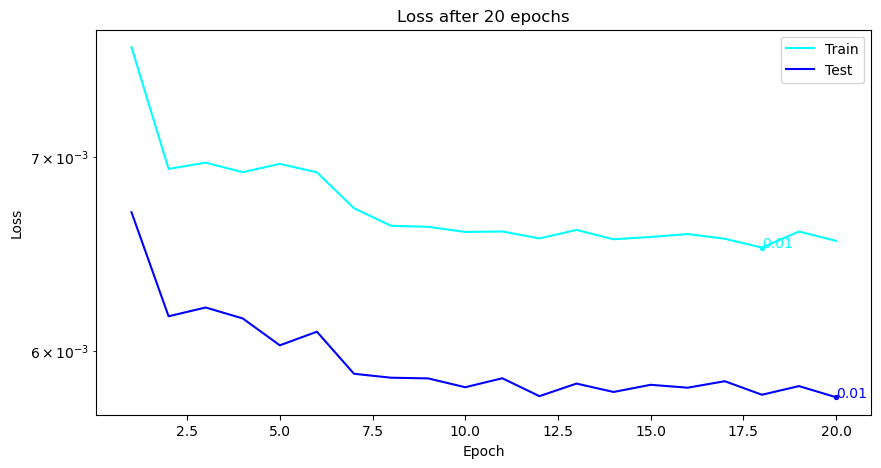

total=270 sec, epoch=20 (13.5 sec/epoch), train=0.0065 (-0.74%), test=0.0058 (-0.88%), overfit=0.88
*** Best! loss=0.0067, model=latent=6, layer3=46, layer2=340, layer1=1802, hyper=batch=9, learning_rate=0.001, weight_decay=5e-05
total=287 sec, epoch=21 (13.7 sec/epoch), train=0.0067 (1.59%), test=0.0059 (1.52%), overfit=0.88
total=301 sec, epoch=22 (13.7 sec/epoch), train=0.0065 (-1.77%), test=0.0058 (-1.56%), overfit=0.88
total=314 sec, epoch=23 (13.7 sec/epoch), train=0.0066 (1.42%), test=0.0058 (1.02%), overfit=0.88
total=328 sec, epoch=24 (13.7 sec/epoch), train=0.0065 (-1.96%), test=0.0058 (-0.67%), overfit=0.89
total=342 sec, epoch=25 (13.7 sec/epoch), train=0.0065 (-0.15%), test=0.0058 (-0.82%), overfit=0.89
total=356 sec, epoch=26 (13.7 sec/epoch), train=0.0065 (0.63%), test=0.0058 (0.92%), overfit=0.89
total=369 sec, epoch=27 (13.7 sec/epoch), train=0.0065 (-0.06%), test=0.0058 (0.27%), overfit=0.89


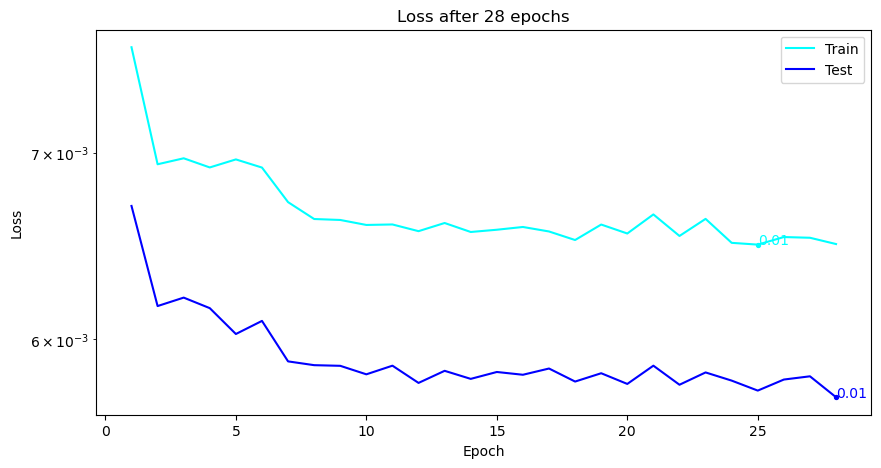

total=384 sec, epoch=28 (13.7 sec/epoch), train=0.0065 (-0.52%), test=0.0057 (-1.72%), overfit=0.88
total=399 sec, epoch=29 (13.7 sec/epoch), train=0.0065 (0.54%), test=0.0058 (0.94%), overfit=0.88
total=412 sec, epoch=30 (13.7 sec/epoch), train=0.0065 (0.01%), test=0.0058 (0.54%), overfit=0.89
total=426 sec, epoch=31 (13.7 sec/epoch), train=0.0065 (-0.14%), test=0.0058 (-0.43%), overfit=0.89
total=439 sec, epoch=32 (13.7 sec/epoch), train=0.0066 (0.86%), test=0.0059 (1.28%), overfit=0.89
total=453 sec, epoch=33 (13.7 sec/epoch), train=0.0065 (-1.20%), test=0.0058 (-1.02%), overfit=0.89
total=466 sec, epoch=34 (13.7 sec/epoch), train=0.0065 (-0.18%), test=0.0058 (-0.59%), overfit=0.89
total=480 sec, epoch=35 (13.7 sec/epoch), train=0.0065 (0.61%), test=0.0058 (0.82%), overfit=0.89
total=493 sec, epoch=36 (13.7 sec/epoch), train=0.0065 (-0.32%), test=0.0058 (-0.22%), overfit=0.89
total=507 sec, epoch=37 (13.7 sec/epoch), train=0.0065 (0.07%), test=0.0058 (-0.63%), overfit=0.88
total=520

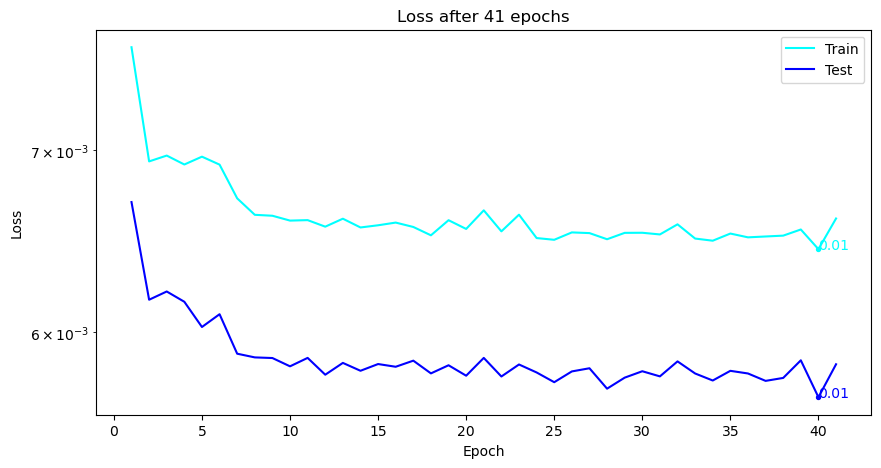

total=561 sec, epoch=41 (13.7 sec/epoch), train=0.0066 (2.63%), test=0.0058 (2.83%), overfit=0.88
total=574 sec, epoch=42 (13.7 sec/epoch), train=0.0065 (-1.78%), test=0.0058 (-1.11%), overfit=0.89
total=588 sec, epoch=43 (13.7 sec/epoch), train=0.0065 (0.62%), test=0.0058 (0.31%), overfit=0.89
total=601 sec, epoch=44 (13.7 sec/epoch), train=0.0065 (-0.43%), test=0.0057 (-0.82%), overfit=0.88
total=615 sec, epoch=45 (13.7 sec/epoch), train=0.0065 (0.00%), test=0.0058 (0.53%), overfit=0.89
total=628 sec, epoch=46 (13.7 sec/epoch), train=0.0065 (-0.31%), test=0.0057 (-0.85%), overfit=0.88
total=642 sec, epoch=47 (13.7 sec/epoch), train=0.0065 (0.04%), test=0.0058 (0.66%), overfit=0.89
total=655 sec, epoch=48 (13.6 sec/epoch), train=0.0065 (-0.12%), test=0.0057 (-0.31%), overfit=0.89
total=669 sec, epoch=49 (13.6 sec/epoch), train=0.0065 (0.87%), test=0.0058 (1.00%), overfit=0.89
total=682 sec, epoch=50 (13.6 sec/epoch), train=0.0065 (-0.90%), test=0.0057 (-1.05%), overfit=0.89
total=695 

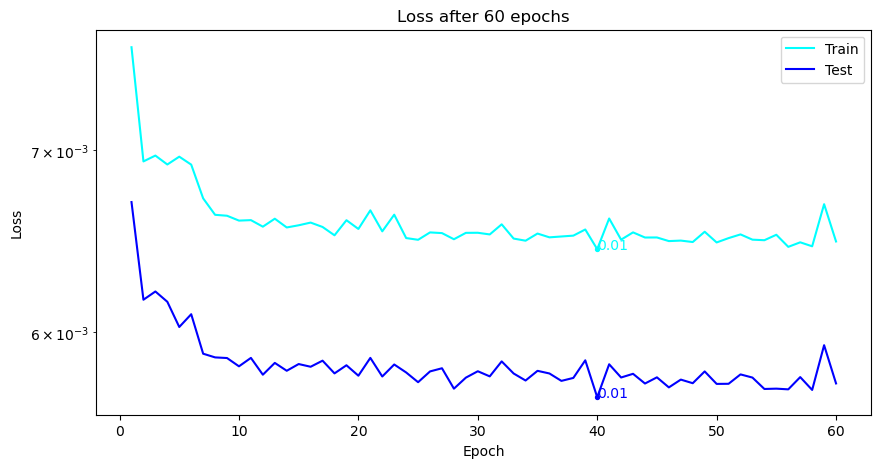

total=816 sec, epoch=60 (13.6 sec/epoch), train=0.0065 (-3.11%), test=0.0057 (-3.19%), overfit=0.89
Training is stalled...


Finished Training after 60 epochs in 816.3 sec (13.60 sec/epoch), sample duration=2.0 sec, test loss=0.01, train loss=0.01, overfit=0.9


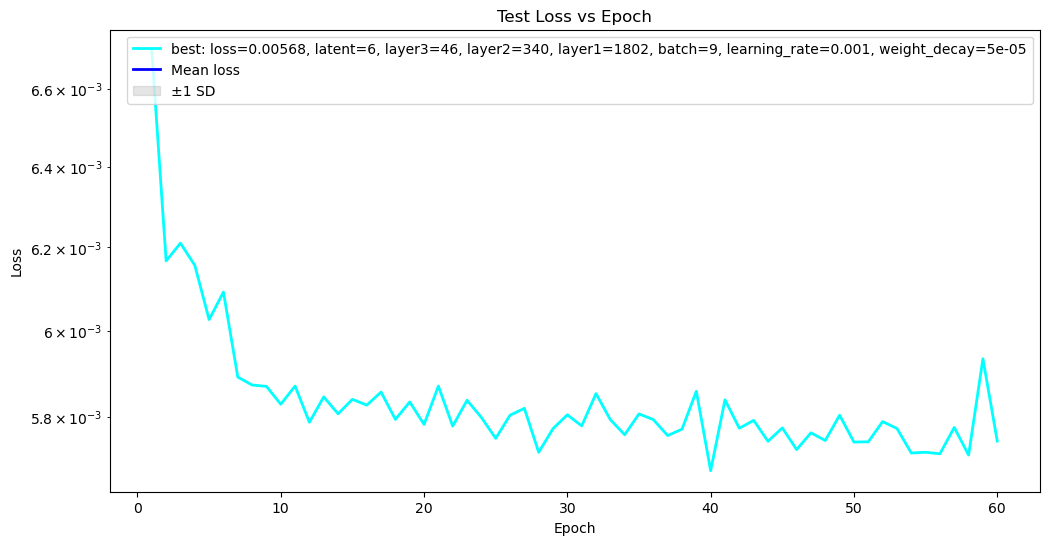

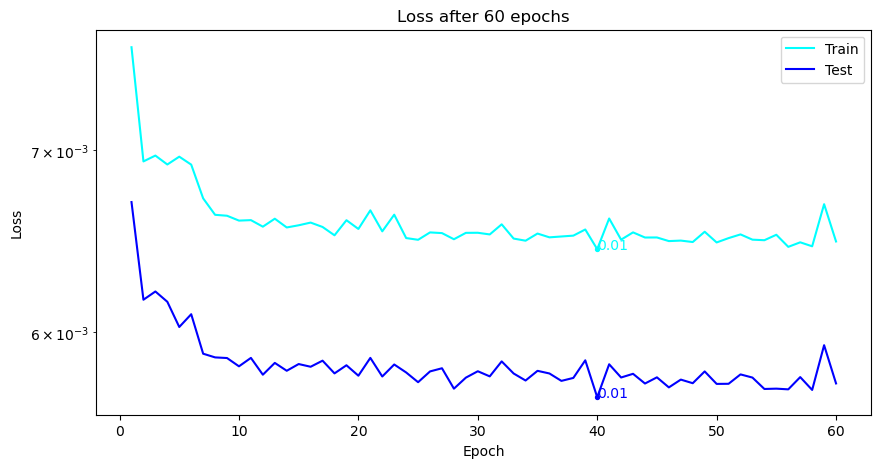

In [4]:
from HyperParameterTuning import *

#optimise_hyper_parameters()
#train_best_params()

STFTVariationalAutoEncoder: sequence_length=114, stft_buckets=1024, sizes=[116736, 1802, 340, 46, 6], activation_fn=<class 'torch.nn.modules.activation.ReLU'>
model=STFTVariationalAutoEncoder(
  (vae): VariationalAutoEncoder(
    (encoder_layers): ModuleList(
      (0): Linear(in_features=116736, out_features=1802, bias=True)
      (1): Linear(in_features=1802, out_features=340, bias=True)
      (2): Linear(in_features=340, out_features=46, bias=True)
    )
    (fc_mu): Linear(in_features=46, out_features=6, bias=True)
    (fc_logvar): Linear(in_features=46, out_features=6, bias=True)
    (decoder_layers): ModuleList(
      (0): Linear(in_features=6, out_features=46, bias=True)
      (1): Linear(in_features=46, out_features=340, bias=True)
      (2): Linear(in_features=340, out_features=1802, bias=True)
      (3): Linear(in_features=1802, out_features=116736, bias=True)
    )
    (activation_fn): ReLU()
  )
)
Loaded 930 STFTs from STFTs.pkl


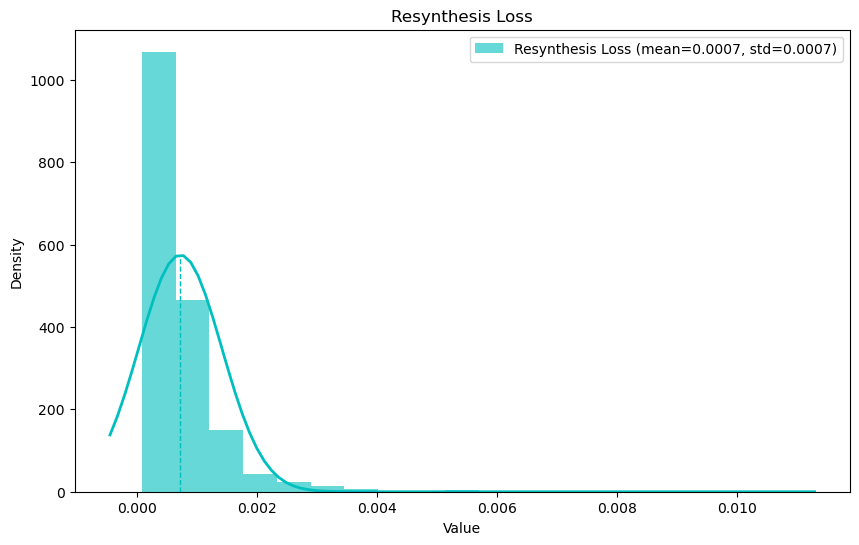

In [7]:
# Test every sample and measure the error.
test_all()


In [6]:
# Generate some new samples, either by interpolation or randome perturbation
from Generate import *

#generate_morphs()

#generate_variations()

# Create a graph of various encodings: this is how I find out that a small latent layer should be feasible
plot_encodings()

# Generate samples from each variable
generate_main_encodings()